<a href="https://colab.research.google.com/github/supanut-suntikoon/MDPI-Water/blob/main/MDPI_Water_Rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rainfall-Discharge

<ipython-input-3-ecd3d6c52f22>:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(months, rotation=45, ha='right')


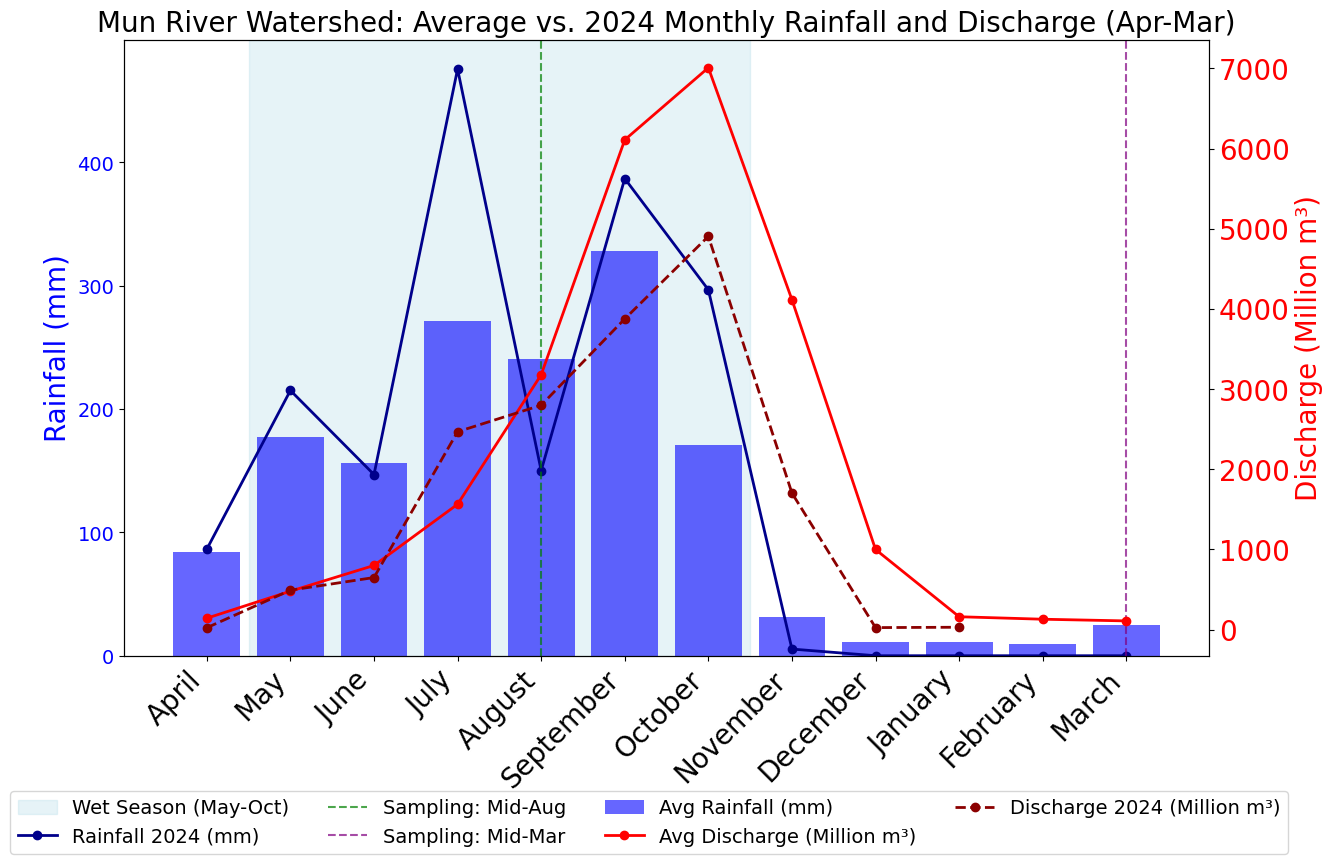

Graph saved at: MunRiver_Rainfall_Discharge_2009-2024.png


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Download the file from the GitHub repository
url = 'https://github.com/supanut-suntikoon/MDPI-water/raw/main/rainfall_discharge.xlsx'
file_path = 'rainfall_discharge.xlsx'
response = requests.get(url)
with open(file_path, 'wb') as f:
    f.write(response.content)

# Load the data from both sheets
rainfall_data = pd.read_excel(file_path, sheet_name='rainfall-M.152')
discharge_data = pd.read_excel(file_path, sheet_name='discharge-M.11B')

# Define month order (April to March to reflect hydrological year)
months = ['April', 'May', 'June', 'July', 'August', 'September',
          'October', 'November', 'December', 'January', 'February', 'March']

# Rearrange columns in the correct order
rainfall_monthly = rainfall_data[months]
discharge_monthly = discharge_data[months]

# Extract 2024 data (sampling year)
rainfall_2024 = rainfall_data[rainfall_data['years'] == 2024].iloc[0, 1:]  # Exclude 'years' column
discharge_2024 = discharge_data[discharge_data['years'] == 2024].iloc[0, 1:]

# Calculate average monthly rainfall and discharge across all years (2009-2024)
avg_rainfall = rainfall_monthly.mean(axis=0)
avg_discharge = discharge_monthly.mean(axis=0)

# Plot the data
fig, ax1 = plt.subplots(figsize=(14, 8))

# Highlight wet season (May to October)
wet_start, wet_end = 1, 6  # Indices for May to October in the months list
ax1.axvspan(wet_start - 0.5, wet_end + 0.5, color='lightblue', alpha=0.3, label='Wet Season (May-Oct)')

# Plot average rainfall as bars on left y-axis
ax1.bar(months, avg_rainfall, color='blue', alpha=0.6, label='Avg Rainfall (mm)')
ax1.set_ylabel('Rainfall (mm)', color='blue', fontsize=20)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=14)
ax1.tick_params(axis='x', labelsize=20)

# Rotate x-axis labels for better readability
ax1.set_xticklabels(months, rotation=45, ha='right')

# Plot 2024 rainfall data as a line on left y-axis
ax1.plot(months, rainfall_2024, color='darkblue', marker='o', label='Rainfall 2024 (mm)', linewidth=2)

# Create a twin axis for discharge data
ax2 = ax1.twinx()
ax2.plot(months, avg_discharge, color='red', marker='o', linestyle='-', label='Avg Discharge (Million m³)', linewidth=2)
ax2.plot(months, discharge_2024, color='darkred', marker='o', linestyle='--', label='Discharge 2024 (Million m³)', linewidth=2)
ax2.set_ylabel('Discharge (Million m³)', color='red', fontsize=20)
ax2.tick_params(axis='y', labelcolor='red', labelsize=20)

# Mark sampling points (mid-March and mid-August)
ax1.axvline(x=4, color='green', linestyle='--', alpha=0.7, label='Sampling: Mid-Aug')  # August
ax1.axvline(x=11, color='purple', linestyle='--', alpha=0.7, label='Sampling: Mid-Mar')  # March

# Title
plt.title('Mun River Watershed: Average vs. 2024 Monthly Rainfall and Discharge (Apr-Mar)', fontsize=20)

# Adjust legend to the bottom of the graph, arranged horizontally
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=14)

# Remove grid
ax1.grid(False)
ax2.grid(False)

# Save the figure
output_path = 'MunRiver_Rainfall_Discharge_2009-2024.png'
plt.savefig(output_path, dpi=300, format='png', bbox_inches='tight')
plt.show()

# Display path to the saved file
print(f"Graph saved at: {output_path}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Download the file from the URL
url = 'https://github.com/supanut-suntikoon/MunRiver/raw/main/STT50.xlsx'
file_path = 'STT50.xlsx'
response = requests.get(url)
with open(file_path, 'wb') as f:
    f.write(response.content)

# Load the data from both sheets
rainfall_data = pd.read_excel(file_path, sheet_name='rainfall-M.152')
discharge_data = pd.read_excel(file_path, sheet_name='discharge-M.11B')

# Adjust month order (April to March)
months = ['April', 'May', 'June', 'July', 'August', 'September',
          'October', 'November', 'December', 'January', 'February', 'March']

# Rearrange columns in the correct order
rainfall_monthly = rainfall_data[months]
discharge_monthly = discharge_data[months]

# Extract 2024 data
rainfall_2024 = rainfall_data[rainfall_data['years'] == 2024].iloc[0, 1:]  # Assuming years is the first column
discharge_2024 = discharge_data[discharge_data['years'] == 2024].iloc[0, 1:]

# Calculate average monthly rainfall and discharge across all years
avg_rainfall = rainfall_monthly.mean(axis=0)
avg_discharge = discharge_monthly.mean(axis=0)

# Plot the data
fig, ax1 = plt.subplots(figsize=(14, 8))

# Highlight monsoon season (June to October)
monsoon_start, monsoon_end = 2, 6  # Indices for June to October in the months list
ax1.axvspan(monsoon_start - 0.5, monsoon_end + 0.5, color='lightblue', alpha=0.3, label='Monsoon Season')

# Plot average rainfall on left y-axis
ax1.bar(months, avg_rainfall, color='blue', alpha=0.6, label='Avg Rainfall (mm)')
ax1.set_ylabel('Rainfall (mm)', color='blue', fontsize=20)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=14)
# ax1.set_xlabel('Months of the Year (April - March)', fontsize=25)
ax1.tick_params(axis='x', labelsize=20)

# Rotate x-axis labels for better readability
ax1.set_xticklabels(months, rotation=45, ha='right')

# Plot 2024 rainfall data on left y-axis
ax1.plot(months, rainfall_2024, color='darkblue', marker='o', label='Rainfall 2024 (mm)', linewidth=2)

# Create a twin axis for discharge data
ax2 = ax1.twinx()
ax2.plot(months, avg_discharge, color='red', marker='o', linestyle='-', label='Avg Discharge (Million m³)', linewidth=2)
ax2.plot(months, discharge_2024, color='darkred', marker='o', linestyle='--', label='Discharge 2024 (Million m³)', linewidth=2)
ax2.set_ylabel('Discharge (Million m³)', color='red', fontsize=20)
ax2.tick_params(axis='y', labelcolor='red', labelsize=20)

# Title
plt.title('Average vs. 2024 Monthly Rainfall and Discharge (April - March)', fontsize=20)

# Adjust legend to the bottom of the graph, arranged horizontally
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=14)

# Remove grid
ax1.grid(False)
ax2.grid(False)

# Save the figure
output_path = 'Average_vs_2024_Rainfall_Discharge_With_Monsoon_Highlight.png'
plt.savefig(output_path, dpi=300, format='png', bbox_inches='tight')
plt.show()

# Display path to the saved file
print(f"Graph saved at: {output_path}")
